In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('cancer_expression.csv')

In [74]:
data

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Gene96,84,71,34,61,90,77,33,41,91,...,77,32,15,82,43,51,23,19,32,28
96,Gene97,69,33,54,17,5,38,97,52,81,...,21,47,29,7,83,33,36,30,20,29
97,Gene98,75,82,33,87,23,70,45,49,19,...,86,70,81,49,83,24,68,97,97,71
98,Gene99,64,79,99,95,34,6,66,53,13,...,96,13,96,10,33,62,21,20,91,99


In [75]:
data.head(5)

,Gene,Control1,Control2,Control3,Control4,Control5,Control6,Control7,Control8,Control9,...,Treatment6,Treatment7,Treatment8,Treatment9,Treatment10,Treatment11,Treatment12,Treatment13,Treatment14,Treatment15
0,Gene1,56,97,19,76,65,25,87,91,79,...,63,46,96,64,84,19,66,66,51,66
1,Gene2,8,93,64,18,13,94,57,6,88,...,48,38,78,66,18,99,52,19,76,82
2,Gene3,64,45,33,19,49,69,93,75,13,...,27,66,92,41,48,90,95,39,69,51
3,Gene4,94,46,81,55,67,56,8,98,27,...,66,79,96,93,66,5,31,66,81,7
4,Gene5,63,36,92,56,66,62,56,16,43,...,79,60,21,42,28,73,74,90,15,20


In [76]:
#box plots

In [77]:
control_cols=[i for i in data.columns if "Control" in i]
treatment_cols=[i for i in data.columns if "Treatment" in i]

print("Columns of controls")
print(control_cols)
print("Columns of tratements")
print(treatment_cols)

Columns of controls
['Control1', 'Control2', 'Control3', 'Control4', 'Control5', 'Control6', 'Control7', 'Control8', 'Control9', 'Control10', 'Control11', 'Control12', 'Control13', 'Control14', 'Control15']
Columns of tratements
['Treatment1', 'Treatment2', 'Treatment3', 'Treatment4', 'Treatment5', 'Treatment6', 'Treatment7', 'Treatment8', 'Treatment9', 'Treatment10', 'Treatment11', 'Treatment12', 'Treatment13', 'Treatment14', 'Treatment15']


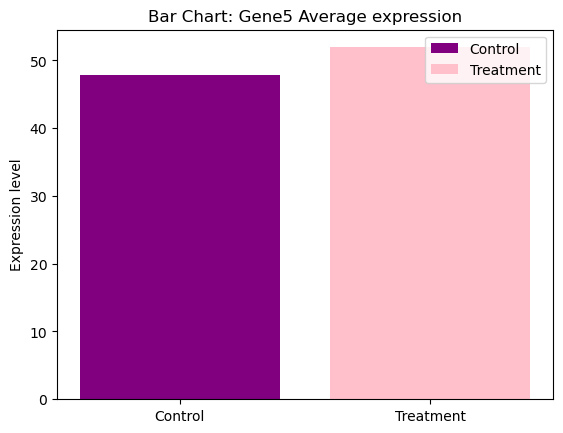

In [78]:
#method1
gene="Gene5"
gene_data=data[data["Gene"]==gene]

control_mean=gene_data[control_cols].mean(axis=1).values[0]
treatment_mean=gene_data[treatment_cols].mean(axis=1).values[0]

plt.bar("Control",control_mean,color='purple',label="Control")
plt.bar("Treatment",treatment_mean,color='pink',label="Treatment")
plt.title(f"Bar Chart: {gene} Average expression")
plt.ylabel('Expression level')
plt.legend()

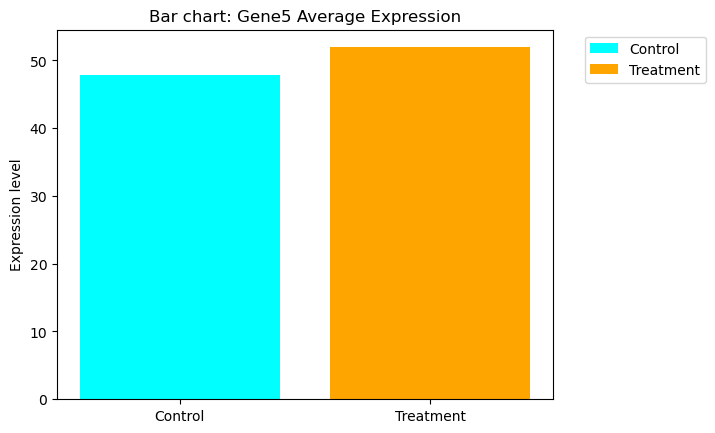

In [79]:
#method2
bars=plt.bar(['Control',"Treatment"],
           [control_mean,treatment_mean],
           color=['cyan','orange'])

plt.title(f"Bar chart: {gene} Average Expression")
plt.ylabel("Expression level")
plt.legend(bars,["Control","Treatment"],
          bbox_to_anchor=(1.05,1),loc="upper left")

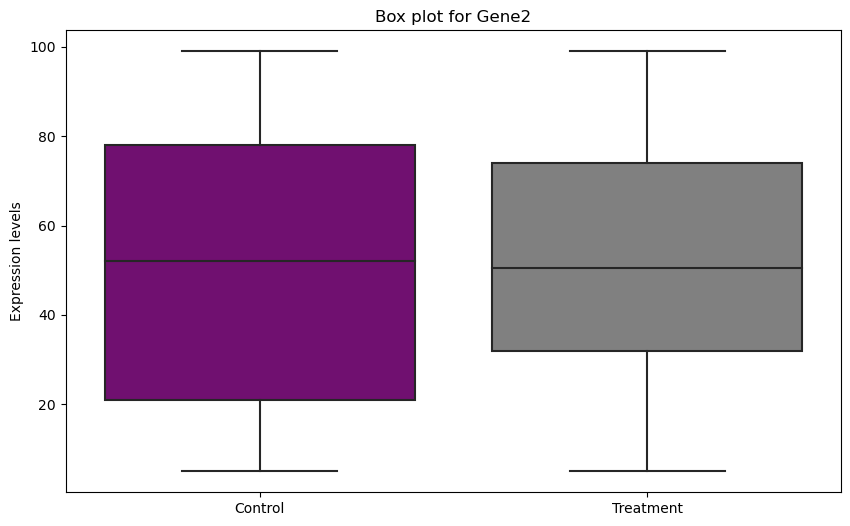

In [90]:
control_data=data[['Control1','Control2']].values.flatten()
treatment_data=data[['Treatment1','Treatment2']].values.flatten()

plt.figure(figsize=(10,6))
sns.boxplot(data=[control_data,treatment_data],palette=['purple','grey'])

plt.xticks([0,1],['Control','Treatment'])
plt.title(f"Box plot for {gene}")
plt.ylabel("Expression levels")
plt.show()

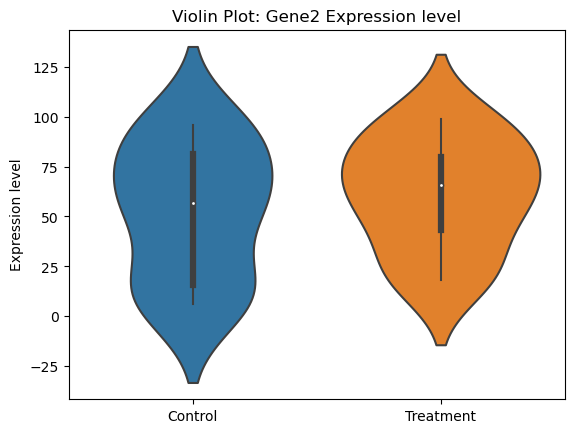

In [86]:
gene="Gene2"
gene_row=data[data["Gene"]==gene].iloc[0]

data=[gene_row[control_cols].values,gene_row[treatment_cols].values]

sns.violinplot(data=data)
plt.xticks([0,1],["Control","Treatment"])
plt.ylabel("Expression level")
plt.title(f"Violin Plot: {gene} Expression level")
plt.show()

In [82]:
print(type(data))

<class 'list'>


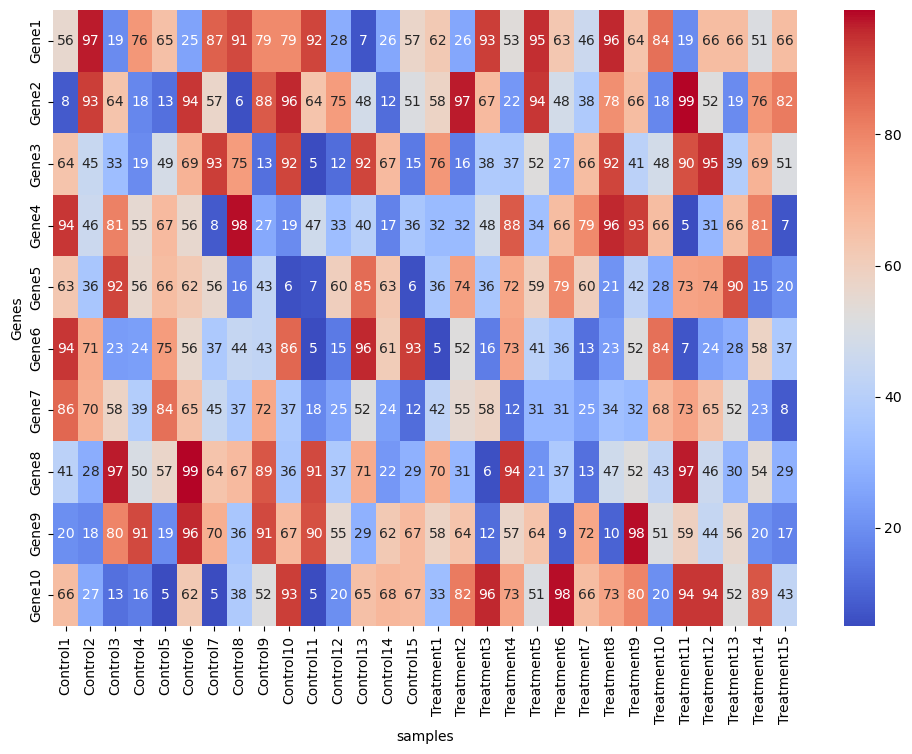

In [85]:
heatmap_data = data.set_index('Gene')
heatmap = heatmap_data.head(10)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap,cmap="coolwarm",annot=True)
plt.xlabel("samples")
plt.ylabel("Genes")
plt.show()